# 🚚 **Optimisation des tournées de livraison (VRP Multi-Flotte)**
## Objectif du livrable
>Ce notebook vise à modéliser et illustrer la problématique d’optimisation des tournées de livraison pour une flotte **hétérogène** (camions électriques, diesel, utilitaires légers).

![alt text](<Project Banner.png>)


> **TODO :** Reformuler la problématique comme suggéré par Tedy :
> *« Comment trouver les meilleurs itinéraires pour tous les camions afin qu’ils livrent les clients le plus rapidement possible, tout en respectant les horaires de livraison et en tenant compte du trafic qui varie selon l’heure de la journée ? »*

## **📍 Contexte et contraintes**

L’entreprise dispose d’une flotte de véhicules **hétérogène** : camions diesel, véhicules électriques, et utilitaires légers.
Chaque véhicule possède sa propre **capacité**, **autonomie** et **fenêtre de disponibilité**.

> **TODO :** Mettre à jour la terminologie (“flotte multiple” → “flotte hétérogène”).  
> Expliquer pourquoi cette distinction change la complexité du problème.  
> Ajouter les contraintes opérationnelles : capacité, horaire, distance, émissions carbone.

## **⚙️ Hypothèses de modélisation**
- Le graphe est **orienté** : chaque arc (i, j) représente un trajet possible.
- **Points du graphe** : chaque objet possède un point de collecte spécifique.
- **Graphe pondéré** : chaque point représente un client, pondéré par le poids de chaque colis.
- **Arcs pondérés** : le temps de parcours d’un arc varie au cours du temps (variation du trafic).
- **Nombre de camions** :
    - *k* camions disponibles simultanément pour effectuer les livraisons.
    - Le calcul de la tournée inclut l’affectation des objets (et donc des points de livraison) aux différents camions, et vise à minimiser la date de retour du dernier camion à la base (makespan).
        - Capacité des camions (2 ou 3 dimensions) et encombrement des objets.
        - Certains objets ne peuvent être livrés que par certains camions.



### 1. **Nœuds (sommets)**

- Chaque **point de collecte** et **point de livraison** est un nœud.
- Attributs possibles pour chaque nœud :
    - `type` : collecte ou livraison
    - `demand` : volume / poids du colis
    - `fenêtre` : plage horaire (si contrainte temporelle)
    - `camion_compatible` : liste des camions pouvant traiter ce nœud



### 2. **Arcs**

- Les arcs représentent les **trajets possibles entre nœuds**.
- Attributs possibles pour chaque arc :
    - `distance` : distance euclidienne ou routière
    - `time(t)` : fonction du temps selon la tranche horaire (trafic dynamique)
    - `cost` : fonction de coût combinant distance, temps et impact CO₂



### 3. **Graphes pondérés et dynamiques**

- **Pondération dynamique** : chaque arc a un poids associé qui varie selon l’heure de départ.
- **Multi-graphes possibles** : plusieurs options de trajets avec des temps différents selon les heures.



### 4. **Camions et affectation**

- Chaque camion *k* est associé à une **tournée** (sous-graphe) :
    - Doit couvrir certains nœuds, en respectant capacités et compatibilités.
    - Objectif : minimiser le **makespan** (retour du dernier camion) ou la **somme des temps de trajet**.
- Les contraintes de capacité et compatibilité sont représentées par des attributs sur les nœuds et filtrées lors de l’assignation des arcs aux camions.


### 5. **Extensions possibles**

- Sous-graphe par camion pour visualiser les tournées.
- Ajout de **fenêtres temporelles** et **temps de service** aux nœuds.
- Modélisation multi-dimensionnelle de la capacité (poids, volume, dimensions).

### Algorithme proposé : 
> **Fonctionnement général de l’algorithme proposé :**

1. **Création du graphe**  
    Générer un graphe orienté représentant les points de collecte et de livraison.

2. **Pondération dynamique des arcs**  
    Faire varier les poids (temps, coût) des arcs selon le trafic et l’heure.

3. **Visualisation**  
    Afficher le graphe et la position des nœuds.

4. **Définition des points de collecte**  
    Associer chaque produit à un point de collecte spécifique.

5. **Paramétrage de la flotte**  
    Définir le nombre de camions disponibles par type et leurs capacités.

6. **Gestion des commandes**  
    Initialiser la liste des clients et des commandes en temps réel.

7. **Affectation des camions**  
    Sélectionner les camions compatibles pour chaque commande.

8. **Chargement et planification**  
    Charger les camions et planifier les tournées en respectant les contraintes.

9. **Optimisation des tournées**  
    Trouver les itinéraires optimaux (ex : cycle eulérien, heuristiques VRP).

10. **Visualisation des tournées**  
     Afficher les chemins attribués à chaque camion.

11. **Suivi des livraisons**  
     Initialiser, suivre et éventuellement annuler une livraison en cours.

12. **Réoptimisation dynamique**  
     Recalculer les itinéraires en cas de nouvelles commandes ou d’incidents.

13. **Gestion opérationnelle**  
     Visualiser les livraisons en cours, camions disponibles, priorités et retards.

14. **Analyse statistique**  
     Générer des statistiques sur les performances des livraisons.

> **TODO :**
> - Remplacer les mentions d’“arêtes” par “arcs”.
> - Simplifier la description des tournées.
> - Introduire le paramètre de pénalité (coût du retard ou contrainte non respectée). (*optionnel*)


## 🧮 **Représentation formelle du problème**



> **TODO :** Mieux détailler le sens de chaque contrainte.  
> Expliquer clairement la signification du paramètre ***p***.  
> Rendre les équations plus pédagogiques (LaTeX + phrase en français).

## 🧠 **Complexité théorique**

Le **problème de tournées de véhicules (VRP)** appartient à la classe des problèmes **NP-difficiles**.  
Cela signifie qu’aucun algorithme connu ne peut garantir une solution optimale en temps polynomial.

En pratique, on emploie des **heuristiques** (Nearest Neighbor, Clarke & Wright) ou des **métaheuristiques** (Recuit simulé, Algorithmes génétiques, Colonies de fourmis…).

> **TODO :** Simplifier cette partie pour rester accessible.  
> Ajouter un exemple chiffré : *Pour 10 clients, le nombre de combinaisons dépasse déjà plusieurs millions de tournées possibles.*

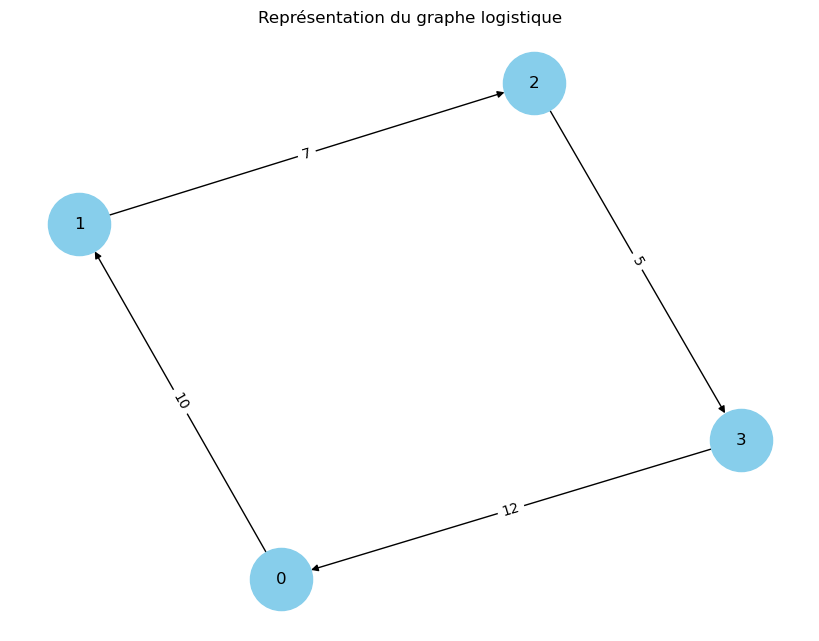

In [ ]:
# Exemple simplifié de Représentation du graphe de livraison

import networkx as nx
import matplotlib.pyplot as plt

G = nx.DiGraph()

# Exemple de nœuds
G.add_nodes_from([
    (0, {"type": "Dépôt"}),
    (1, {"type": "Client", "demande": 10}),
    (2, {"type": "Client", "demande": 8}),
    (3, {"type": "Client", "demande": 5})
])

# Arcs pondérés
arcs = [
    (0, 1, {"distance": 10}),
    (1, 2, {"distance": 7}),
    (2, 3, {"distance": 5}),
    (3, 0, {"distance": 12})
]
G.add_edges_from(arcs)

# Visualisation claire et espacée
pos = nx.spring_layout(G, k=2.5, iterations=100)
plt.figure(figsize=(8, 6))
nx.draw(G, pos, with_labels=True, node_color="skyblue", node_size=2000, arrows=True)
nx.draw_networkx_edge_labels(G, pos, edge_labels=nx.get_edge_attributes(G, "distance"))
plt.title("Représentation du graphe logistique")
plt.show()

# TODO : Ajouter des couleurs différentes par camion (rouge, bleu, vert)
# TODO : Ajouter une légende pour identifier les trajets de chaque véhicule

## 🧩 **Résolution et optimisation**
### **Besoins identifés :**
- Carte du réseau de livraison
- Nombre et dimension des camions
- Type et volume des produits à livrer
- Différents points de collecte
- Fenêtres temporelles
- Plages de validité temporelles
- Minimiser la consommation énergétique
- Liste des clients à desservir

Sous contraintes :
- Fenêtre de temps
- Nombre de camions disponibles
- Capacité des camions (dimensions, poids, volume)
- Trafic variable selon les horaires
- Dépôts uniques ou multiples
- Points de collecte multiples
- Distances et temps de parcours dynamiques
- Gestion des cas particuliers : client absent, annulation
- Catégories :
    - Contraintes modifiant uniquement la valeur des solutions (ex. attente avant ouverture)
    - Contraintes modifiant l’espace des solutions (ex. certains objets nécessitant un type de camion spécifique)

> **TODO :**   
> Montrer comment la solution est construite à partir du graphe.  
> Visualiser le trajet final coloré par camion.

## 🔍 **Analyse des résultats**

Les itinéraires optimisés permettent de réduire le coût global (distance, CO₂, ou durée).  
Les véhicules électriques sont assignés à des zones urbaines denses, les diesel à des trajets plus longs.

> **TODO :** Ajouter un tableau comparatif avant/après optimisation.  
> Commenter les résultats selon les critères logistiques (temps, énergie, émissions).  
> Ajouter une visualisation du graphe final avec les trajets colorés.

## **Conclusion et perspectives**

Ce projet illustre la complexité du **VRP multi-flotte** et les compromis entre performance et contraintes réelles.  
Les prochaines étapes pourraient intégrer :
- Les **données de trafic en temps réel** ;
- Une **modélisation des émissions carbone** dans la fonction de coût ;
- L’**apprentissage automatique** pour ajuster les itinéraires selon les historiques de livraison.

> **TODO :** Ajouter une phrase sur les limites du modèle actuel.  
> Proposer deux perspectives d'amélioration (trafic réel, apprentissage, simulation dynamique…).